# Exploratory Data Analysis

In this section, we're going to investigate some of the data we've collected and see if we can uncover some interesting trends.

Let's start with this question and see where it takes us:

* What are the top 5 states most affected states and what is their current status?


## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('csv_files/states_daily_preprocessed.csv')
df.head()

,Unnamed: 0,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,0,2020-10-03,AK,147,3819,473256,3966
1,1,2020-10-03,AL,1682,9707,1174699,10444
2,2,2020-10-03,AR,746,9936,1068412,10478
3,3,2020-10-03,AS,0,0,1616,0
4,4,2020-10-03,AZ,636,9040,1492856,9641


In [5]:
# Dropping Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)
df.head()

,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,2020-10-03,AK,147,3819,473256,3966
1,2020-10-03,AL,1682,9707,1174699,10444
2,2020-10-03,AR,746,9936,1068412,10478
3,2020-10-03,AS,0,0,1616,0
4,2020-10-03,AZ,636,9040,1492856,9641


## Inspecting Data

Ok, let's double-check the data types and see if there are any missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      11970 non-null  object
 1   state                     11970 non-null  object
 2   positiveIncrease          11970 non-null  int64 
 3   negativeIncrease          11970 non-null  int64 
 4   total                     11970 non-null  int64 
 5   totalTestResultsIncrease  11970 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 561.2+ KB


Whoops!  Looks like I forgot to change `date` to date-time format! Let's take care of that and set it as the index.

In [7]:
# Changing to Date-time
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      11970 non-null  datetime64[ns]
 1   state                     11970 non-null  object        
 2   positiveIncrease          11970 non-null  int64         
 3   negativeIncrease          11970 non-null  int64         
 4   total                     11970 non-null  int64         
 5   totalTestResultsIncrease  11970 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 561.2+ KB


In [8]:
# Setting the 'date' column to index for time series manipulation.
df2 = df.set_index('date')
df2.head()

,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
date,,,,,
2020-10-03,AK,147,3819,473256,3966
2020-10-03,AL,1682,9707,1174699,10444
2020-10-03,AR,746,9936,1068412,10478
2020-10-03,AS,0,0,1616,0
2020-10-03,AZ,636,9040,1492856,9641


One last correction needs to be made.  The values under `total` represent the total number of tests performed, not confirmed positive cases.  So we'll rename this column to prevent confusion

In [9]:
df2 = df2.rename(columns={'total' : 'total_tests'})
df2.head()

,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
date,,,,,
2020-10-03,AK,147,3819,473256,3966
2020-10-03,AL,1682,9707,1174699,10444
2020-10-03,AR,746,9936,1068412,10478
2020-10-03,AS,0,0,1616,0
2020-10-03,AZ,636,9040,1492856,9641


Now that we've fixed that.  Let's make a few initial plots of the dataframe.  It'll be very messy, but we need to see what we're working with considering that we have both repeating states and dates, and a lot of data on VERY different scales.

<AxesSubplot:xlabel='date'>

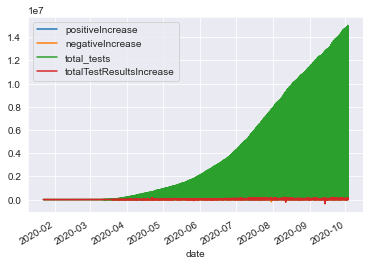

In [10]:
df2.plot()

Alright! So the `.plot()` method makes for a very confusing plot! On top of the fact that the values in `total` are on a Jovian scale compared to the other data points.  Also, even if data on the individual state level are present, they're indistinguishable.

Let's look at what happens if we focus in on only the daily increase of positive cases.

<AxesSubplot:xlabel='date'>

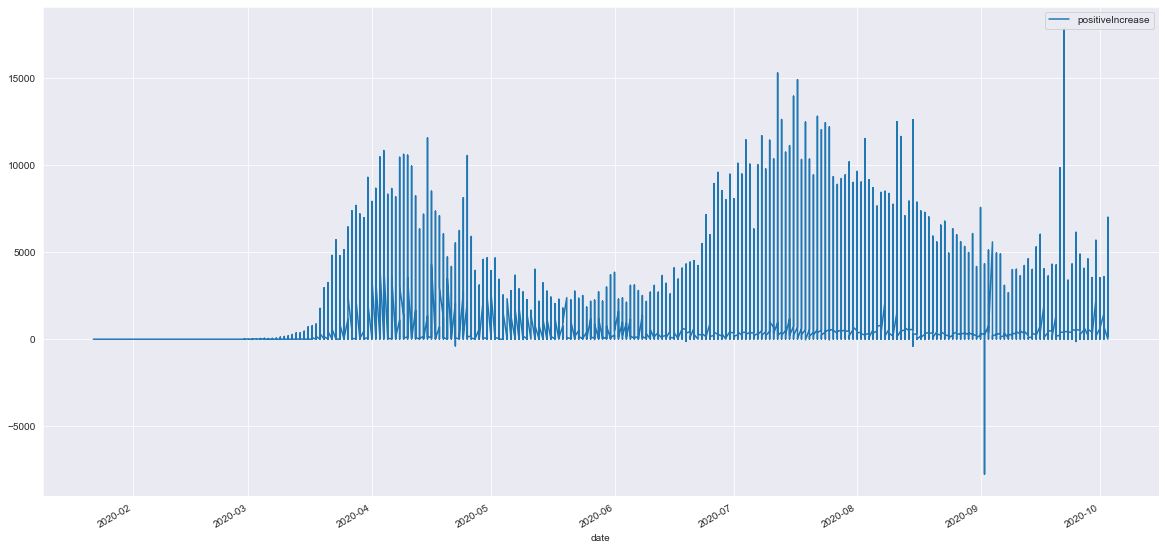

In [11]:
df2_drop = df2.drop(['total_tests', 'negativeIncrease','totalTestResultsIncrease'], 
                    axis=1)

df2_drop.plot(figsize=(20, 10))

It is certainly more clear, but there is still a problem with how we are still unable to distinguish the different cities.  I am very interested in seeing what state had the giant spike in cases in the last few days, though.  We'll put a pin in that for now, however.

For now, let's organize the data by creating different dataframes for each state and store these in a dictionary. 

# Organizing Data

In [12]:
states_complete = {}

for state in df2.state.unique():
    # Keys will be the state's acronym
    key = state 
    # Values are subsets of the dataframe relating to the respective state
    value = df2[df2['state'] == state].reset_index()
    states_complete[key] = value
    
    
states_complete['WA']

,date,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
0,2020-10-03,WA,694,20361,1905759,21685
1,2020-10-02,WA,594,16021,1884704,15985
2,2020-10-01,WA,480,13210,1868089,13690
3,2020-09-30,WA,404,5532,1854399,5936
4,2020-09-29,WA,369,10888,1848463,11257
...,...,...,...,...,...,...
251,2020-01-26,WA,0,0,0,0
252,2020-01-25,WA,0,0,0,0
253,2020-01-24,WA,0,0,0,0
254,2020-01-23,WA,0,0,0,0


Now that everything is inside of a dictionary, we'll make a list of the keys so that we can iterate through the dictionary more easily.

In [13]:
states_complete['AZ']

,date,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
0,2020-10-03,AZ,636,9040,1492856,9641
1,2020-10-02,AZ,551,6657,1483180,7136
2,2020-10-01,AZ,705,13119,1475972,13793
3,2020-09-30,AZ,323,3735,1462148,4047
4,2020-09-29,AZ,674,4164,1458090,4816
...,...,...,...,...,...,...
209,2020-03-08,AZ,0,0,56,0
210,2020-03-07,AZ,2,11,56,13
211,2020-03-06,AZ,1,5,51,6
212,2020-03-05,AZ,0,1,36,1


In [14]:
# Creating list of keys for performing iterations through dicitonary
keys = []

for key in df2.state.unique():
    keys.append(key)

keys[0:5]

['AK', 'AL', 'AR', 'AS', 'AZ']

# States with the Most COVID-19 Cases
Now that we've organized everything, let's find out which states have the most COVID cases.

In [15]:
# Creating dataframe for total number of positive cases per state

state_total_cases = []

for key in states_complete:
    state_total_cases.append(states_complete[key]['positiveIncrease'].sum())
    
state_totals = {}
for i in range(0, 56):
    key = keys[i]
    value = state_total_cases[i]
    state_totals[key] = value

highest_cases = pd.DataFrame.from_dict(state_totals, orient='index')
highest_cases = highest_cases.rename(columns={0:'total_positive'})
highest_cases.head(10)

,total_positive
AK,9187
AL,158380
AR,86525
AS,0
AZ,220397
CA,819383
CO,71896
CT,58297
DC,15473
DE,21125


Now that we've compiled all of this into a new dataframe, let's go ahead and plot this information.

## Total Cases by State

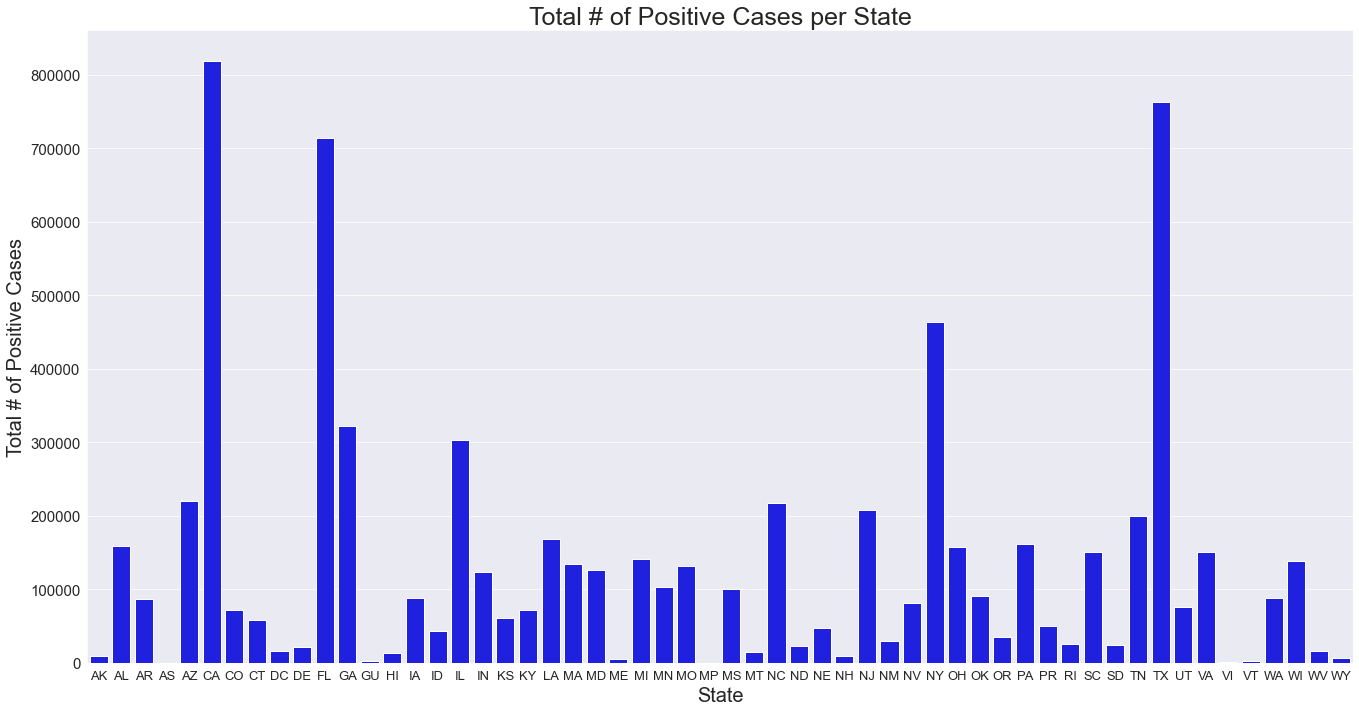

In [16]:
fig = plt.figure(figsize=(19, 10))

sns.barplot(highest_cases.index, 
            highest_cases['total_positive'], 
            color='blue')

plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=13)

plt.ylabel('Total # of Positive Cases', fontsize=20)
plt.yticks(fontsize=15)

plt.title('Total # of Positive Cases per State', fontsize=25)

plt.tight_layout()
plt.show();


Currently, our top 5 states are California, Texas, Florida, New York, and Georgia.  Now, I happen to know that, while New York was hit very hard at first, they made a great recovery.  Let's see if the same can be said of the other states.

### Current Trends

Since we're going to be doing this a few times, let's make a function that takes in a key and a column for a dataframe inside of our dictionary, and returns a dataframe that is formatted for time-series analysis.

In [17]:
def dict_to_timeseries(key, col):
    '''
    Input a key and a column name. 
    
    The function will take those to create a subset of the data for that key 
    consisting of the Date as an index, and 
    the specified column. 
    
    Output: Dataframe 
    '''
    # Creating an empty dictionary to store values
    temp_dict = {}
    
    # Retrieve information 
    for i in range(len(states_complete[key])):
        
        # Keys of dictionary will be the dates 
        k = states_complete[key]['date'][i]
        
        # Retrieve values in the specified column
        val = states_complete[key][col][i]
        
        # Storing values in dictionary
        temp_dict[k] = val    
    
    # Create dataframe from the dictionary with dates as the index
    ts_df = pd.DataFrame.from_dict(temp_dict, orient='index')
    
    # Rename the column to the name specified
    ts_df = ts_df.rename(columns={0 : key + '_' + col})
    
    return ts_df

# Test
CA = dict_to_timeseries('CA', 'positiveIncrease')
print(f"This is a {type(CA)} object")
CA.head()

This is a <class 'pandas.core.frame.DataFrame'> object


,CA_positiveIncrease
2020-10-03,2159
2020-10-02,3590
2020-10-01,3062
2020-09-30,3200
2020-09-29,2162


Now that we've got our function (and it works), it's time to go ahead make dataframes for our remaining 4 states.

In [18]:
TX = dict_to_timeseries('TX', 'positiveIncrease')
GA = dict_to_timeseries('GA', 'positiveIncrease')
NY = dict_to_timeseries('NY', 'positiveIncrease')
FL = dict_to_timeseries('FL', 'positiveIncrease')

In [19]:
top_5 = pd.concat([CA, TX, GA, NY, FL], axis=1, join='outer')
top_5.head(15)

,CA_positiveIncrease,TX_positiveIncrease,GA_positiveIncrease,NY_positiveIncrease,FL_positiveIncrease
2020-10-03,2159,7006,1444,1731,2787
2020-10-02,3590,3503,1300,1598,2660
2020-10-01,3062,3534,1308,1382,2628
2020-09-30,3200,5683,1720,1000,1948
2020-09-29,2162,3541,1025,1189,3266
2020-09-28,2955,4611,596,834,738
2020-09-27,4071,1694,812,866,1882
2020-09-26,4197,4886,1359,1005,2795
2020-09-25,3400,4633,1468,908,2847
2020-09-24,3170,4320,1368,955,2541


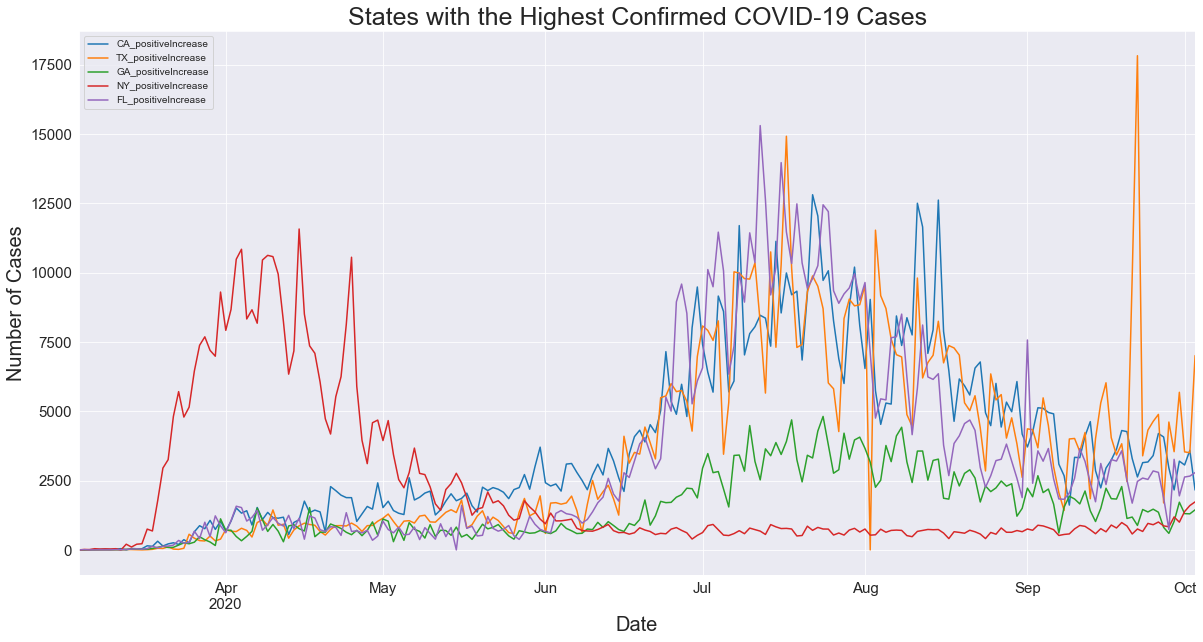

In [23]:
top_5.plot(figsize=(20, 10), legend=True, fontsize=15)
plt.xlabel('Date', size=20)
plt.ylabel('Number of Cases', size=20)
plt.title('States with the Highest Confirmed COVID-19 Cases', size=25)
plt.show();

This is a little messy, but I think it's important to see them all on a single graph so that we have more context when we look at the subplots.  Let's do that next!

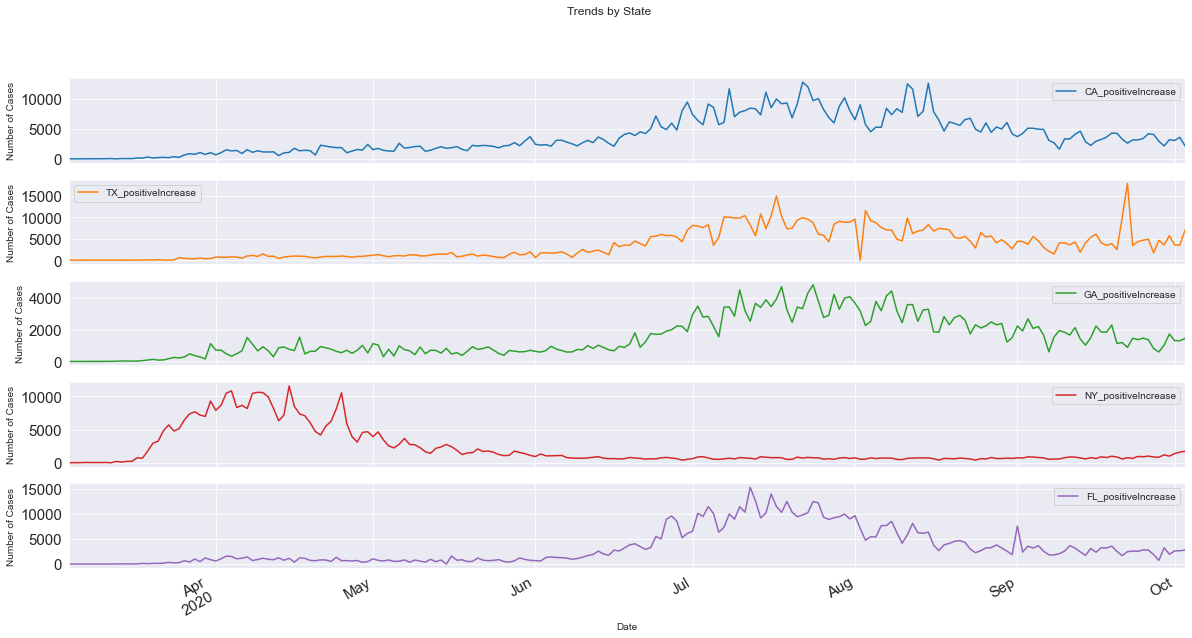

In [29]:
top_5.plot(figsize=(20, 10), subplots=True, legend=True, 
           title='Trends by State', xlabel='Date', 
           ylabel='Number of Cases', fontsize=15);

As we mentioned earlier, New York was hit hard at the beginning, but stabilized since then.  The other states, on the other hand, seem to follow a trend, with exponential increase over the summer months and tapering down (with the exception of Texas' massive spike in cases) are tapering down and converging.

Two things stand out to me here.  One is that four out of five of these states seem increase in late June, peak in mid- to late July, and decrease as we enter the fall season.  What is so special about these summer months?

The second thing that stands out is how New York has sustained extremely low numbers (relative to population) while these other states were reaching their peak. This begs the question: What are they doing differently that sets them apart from these other states?   

### Is This a National Trend?

Before we answer these questions, let's got ahead and check for any other states that are following a similar trend

In [20]:
national = pd.DataFrame()

In [21]:
# Create a dataframe for national data. 

for key in keys:
    df = dict_to_timeseries(key, 'positiveIncrease')
    national = pd.concat([national, df], axis=1, join='outer')
# Checking for NaN values
national.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2020-01-22 to 2020-10-03
Freq: D
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AK_positiveIncrease  212 non-null    float64
 1   AL_positiveIncrease  211 non-null    float64
 2   AR_positiveIncrease  212 non-null    float64
 3   AS_positiveIncrease  202 non-null    float64
 4   AZ_positiveIncrease  214 non-null    float64
 5   CA_positiveIncrease  214 non-null    float64
 6   CO_positiveIncrease  213 non-null    float64
 7   CT_positiveIncrease  211 non-null    float64
 8   DC_positiveIncrease  213 non-null    float64
 9   DE_positiveIncrease  212 non-null    float64
 10  FL_positiveIncrease  214 non-null    float64
 11  GA_positiveIncrease  214 non-null    float64
 12  GU_positiveIncrease  202 non-null    float64
 13  HI_positiveIncrease  211 non-null    float64
 14  IA_positiveIncrease  212 non-null    float64
 15  ID_positiveIn

These new NaN values are only present because some of the states, such as Washington, had cases as early as January, while most others only started in March.  With this knowledge, we can comfortably infer that these missing values are zero and fill them accordingly. 

In [22]:
national = national.fillna(0).astype(int)
national.isna().any()

AK_positiveIncrease    False
AL_positiveIncrease    False
AR_positiveIncrease    False
AS_positiveIncrease    False
AZ_positiveIncrease    False
CA_positiveIncrease    False
CO_positiveIncrease    False
CT_positiveIncrease    False
DC_positiveIncrease    False
DE_positiveIncrease    False
FL_positiveIncrease    False
GA_positiveIncrease    False
GU_positiveIncrease    False
HI_positiveIncrease    False
IA_positiveIncrease    False
ID_positiveIncrease    False
IL_positiveIncrease    False
IN_positiveIncrease    False
KS_positiveIncrease    False
KY_positiveIncrease    False
LA_positiveIncrease    False
MA_positiveIncrease    False
MD_positiveIncrease    False
ME_positiveIncrease    False
MI_positiveIncrease    False
MN_positiveIncrease    False
MO_positiveIncrease    False
MP_positiveIncrease    False
MS_positiveIncrease    False
MT_positiveIncrease    False
NC_positiveIncrease    False
ND_positiveIncrease    False
NE_positiveIncrease    False
NH_positiveIncrease    False
NJ_positiveInc

Real quick, let's save this dataframe as a csv!

In [23]:
national.to_csv('national_positive_increase.csv')

Now let's plot out the national data and just follow the contours.  The criteria we're looking for is that the state must have:

* Lower numbers (relative to the state) prior to the summer 
* Increase as they enter summer (around May or June), 
* Generally peak in July or early August
* Begin to slope down as we get closer September and October.  

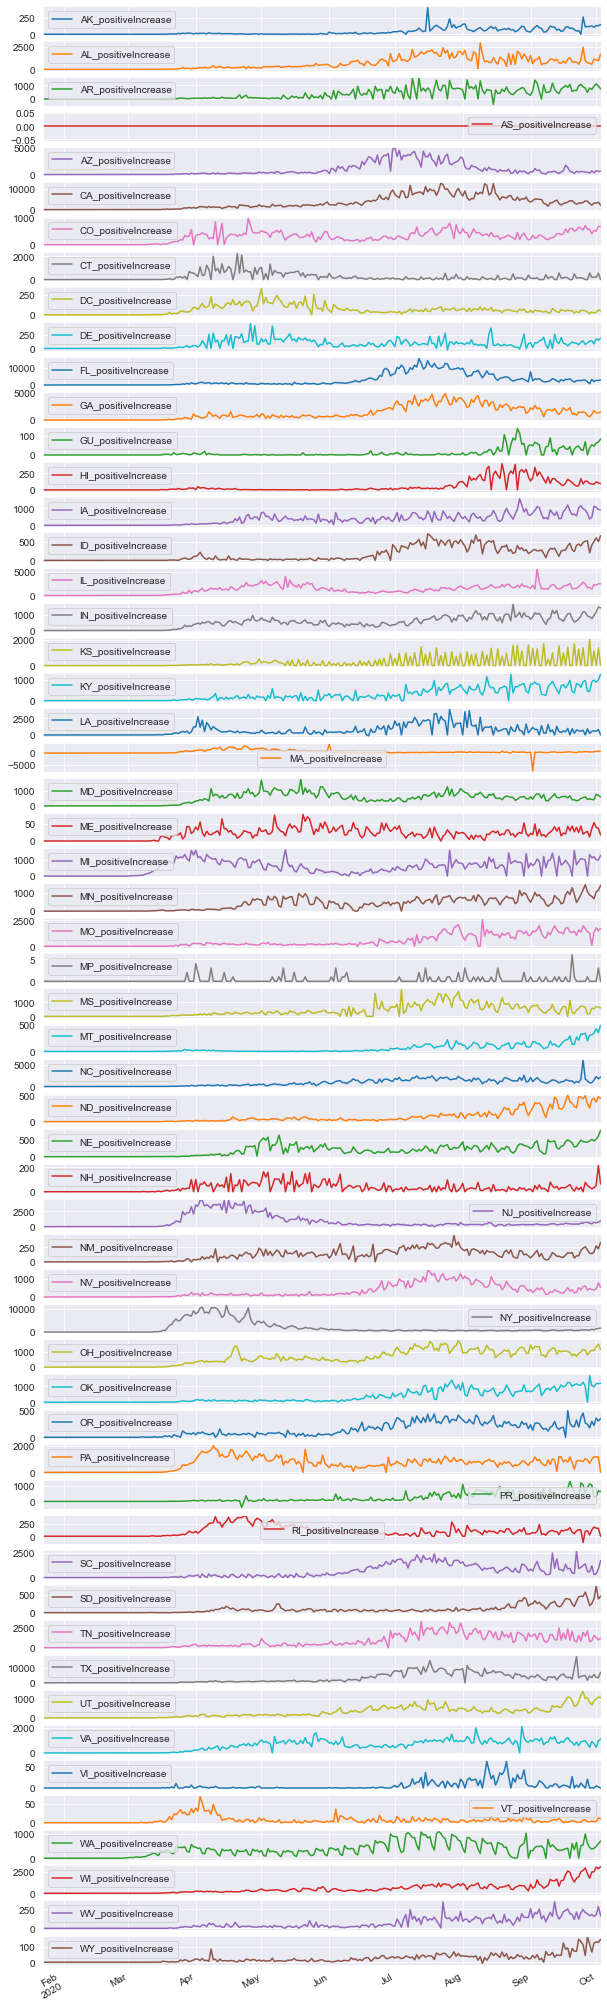

In [24]:
national.plot(figsize=(10, 40), subplots=True);

States with very low numbers (relatively) prior to the summer, then see an increase starting late June, peak in July, and lower towards beginning of fall:
**Alabama**, **Arizona**, **California**, **Florida**, **Georgia**, **Idaho\***, **Louisiana**, **Mississippi**, **Nevada**, **Ohio\***, **South Carolina**, **Tennessee**, **Texas**, **Utah**, **Washington\*\***, **Oregon\***, and **Missouri\***. 

**Note:** States with a **single asterisk (\*)** are states that have a similar trend but have **continued to increase in cases**.  **States with a double asterisk (\*\*)** are states that have had **relatively smaller, fluctuating numbers prior** to the summer season, but still see an increase in positive cases and a decrease leading into fall.

Let's make one really messy plot of all of these states next to each other.

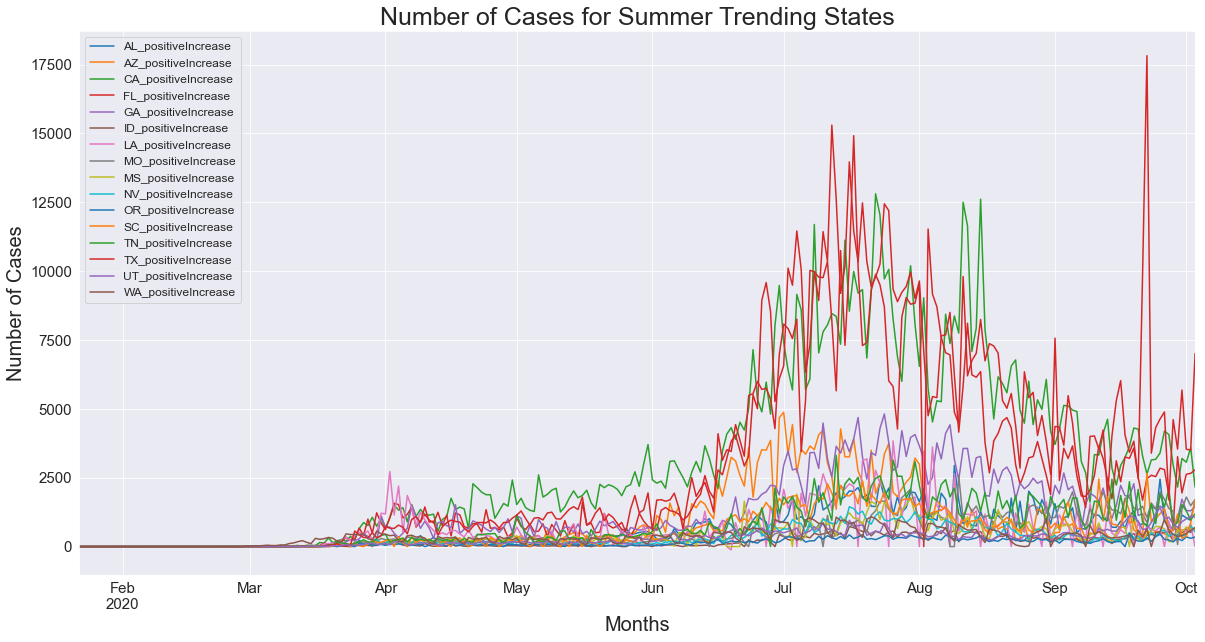

In [36]:
summer_trends = national[['AL_positiveIncrease', 'AZ_positiveIncrease', 
                          'CA_positiveIncrease', 'FL_positiveIncrease', 
                          'GA_positiveIncrease', 'ID_positiveIncrease', 
                          'LA_positiveIncrease', 'MO_positiveIncrease', 
                          'MS_positiveIncrease', 'NV_positiveIncrease', 
                          'OR_positiveIncrease','SC_positiveIncrease', 
                          'TN_positiveIncrease', 'TX_positiveIncrease', 
                          'UT_positiveIncrease', 'WA_positiveIncrease']]
summer_trends.plot(figsize=(20, 10))
plt.xlabel('Months', size=20)
plt.xticks(size=15)
plt.ylabel('Number of Cases', size=20)
plt.yticks(size=15)
plt.title('Number of Cases for Summer Trending States', size=25)
plt.legend()
plt.show();

So what did this accomplish? Well, now we know that only 3 states had over 5000 new cases in a single day (California, Florida, and Texas).  We also know that a majority of these states had less than 2500 cases in a single day.  

With that, let's look at them individually.

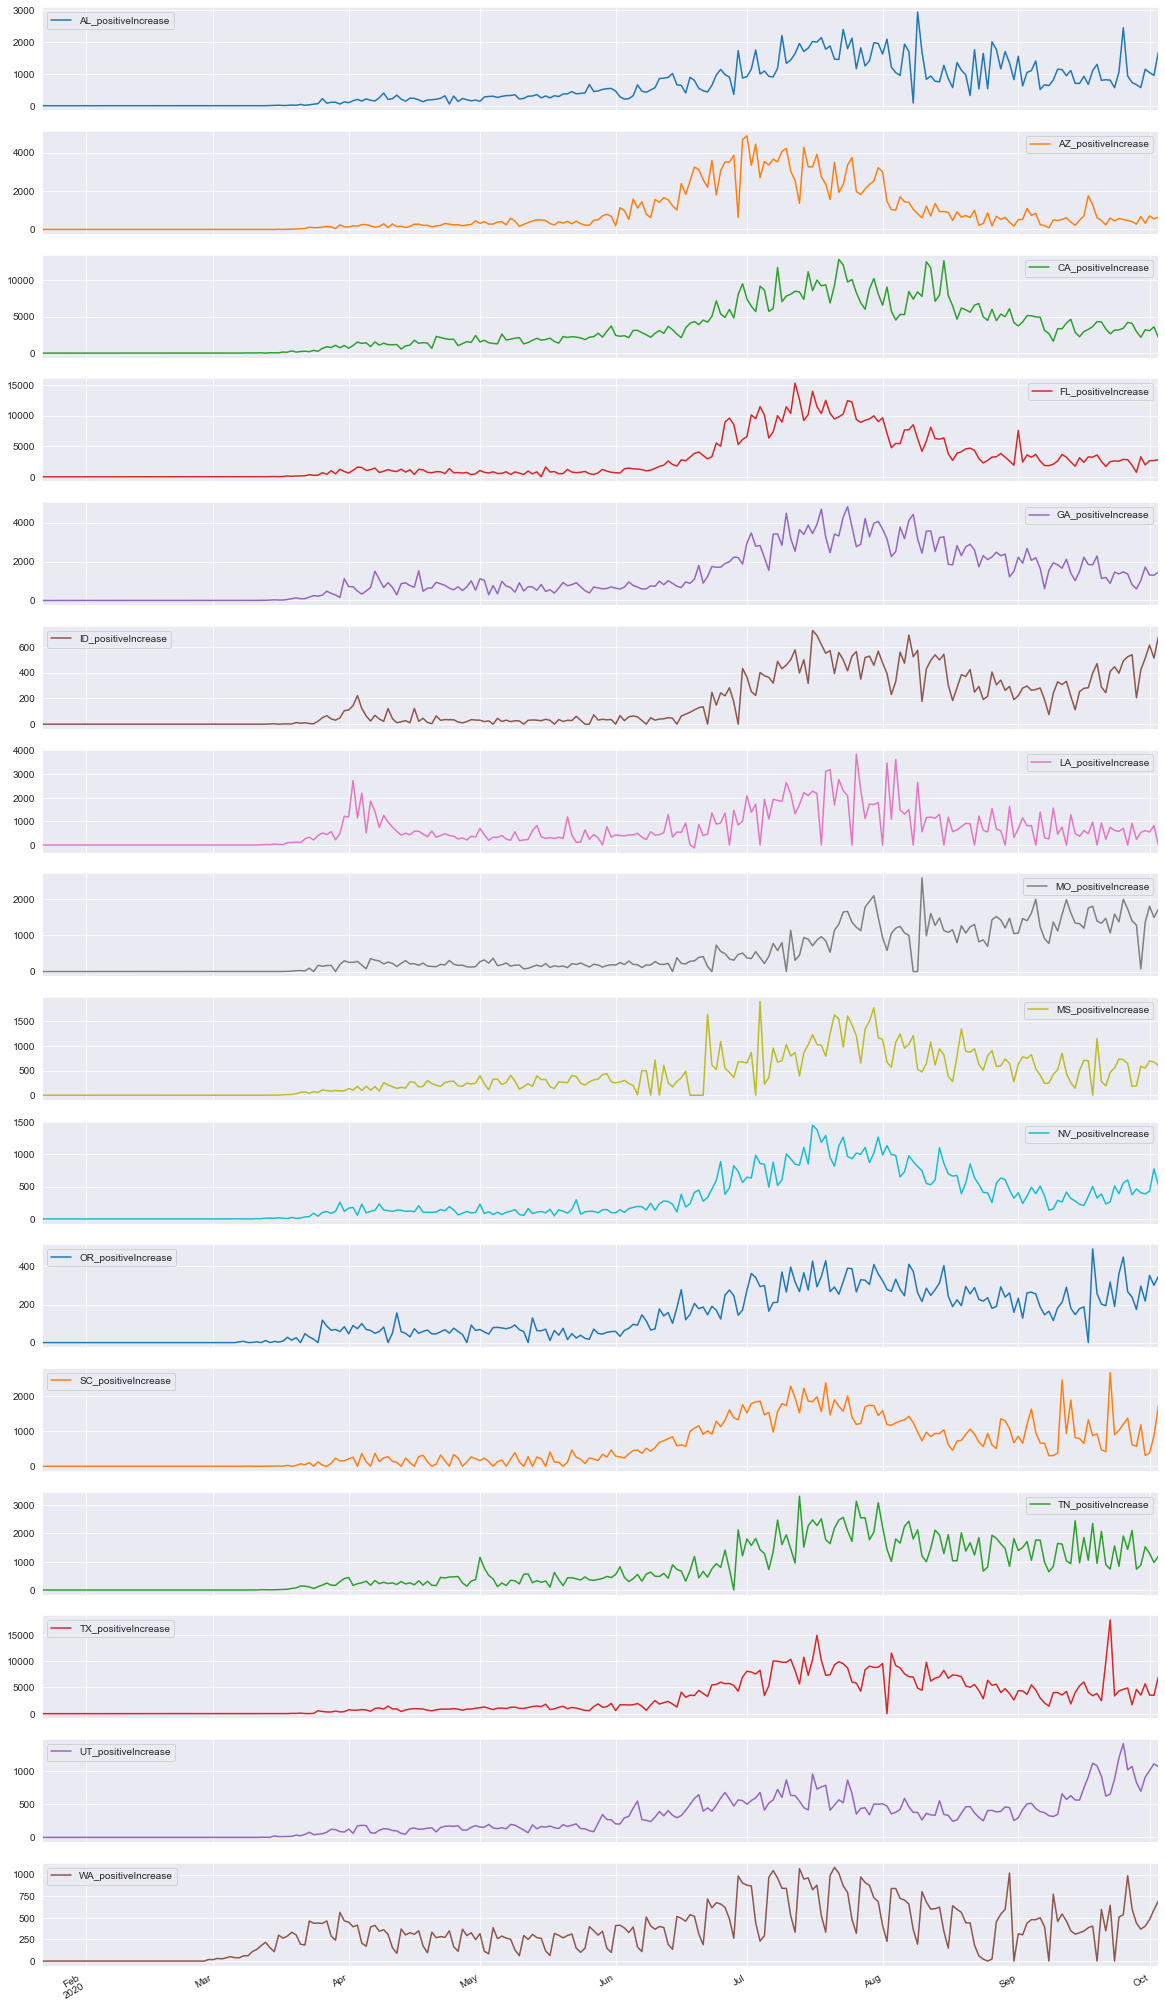

In [37]:
summer_trends.plot(figsize=(20, 40), subplots=True);

# The Media Problem

The problem with trying to explain why we would see an increase in the summer is that the social media, politicians, and other news outlets have tried to create various narratives to explain the situation and influence our perception.  Here are just some examples that I've heard from listening to various people's opinions

* The states are too conservative and weren't restrictive enough.
* The states are too liberal and their restrictions are ineffective.
* The states opened up too soon. 
* The protests exacerbated the situation.
* The rioting is making things worse.

Well, as we can see from the above, a state's political alignment has little to nothing to do with whether or not you'll see an increase in cases.  There both parties are pretty well represented.  In fact, in the top 3 we have a conservative state (Texas), a liberal state (California), and a swing state (Florida).

What about opening up too soon?  Well, most of these states began opening up in early- to mid-May and the exponential growth began (generally speaking, we have a couple that started in early June) in mid- to late-June.  If the states were opening too soon, one would expect to see a surge in cases starting in the middle of May, but we see that that is generally not the case.  

Protests and riots? It's undeniable that the streets have been more dense with people since the murder of George Floyd and that the higher the density of people, the easier the spread.  I also have no doubt that a few people may have contracted the disease as a result of attending some of these protests.  The time frame also works out, too.  George Floyd was murdered on May 25 and protests began almost immediately.  Protesting in New York began just 3 days later (abcnewsgo.com).  There lies the problem with this argument, however.  New York maintained very low numbers with respect to population during this time.  They didn't do anything special to keep the disease from spreading during the protests, either.  Their streets and bridges were just as packed.  Even though their governor didn't officially begin re-opening the state until June 8th (abcnewsgo.com), people were still breaking quarantine to exercise their right to freedoms of speech and protest.  So neither the protests or the riots can be a primary cause for the increase in cases.

These arguments also don't explain why these 16 states in particular are seeing this increasing and decreasing trend over the summer months.  So what could be causing this trend?  

What happens during the summer?

# Summer Vacation

Sadly, there isn't too much evidence to back this up. It's true that 5 (or 8 if you include states with popular national parks) out of 16 of our states are popular tourist spots (**California**, **Louisiana**, **Florida**, **Nevada**, **South Carolina**, and **Tennessee**.)  You might be wondering about **South Carolina**, but I can tell you that South Carolina is where many Georgians travel to when they want to go the the beach.  If you look at this heat map of cumulative cases per county in June, you'll definitely see that South Carolina's coastal counties have some of the highest numbers for their state.  Las Vegas and Reno, Nevada are also reporting high numbers.    

## May

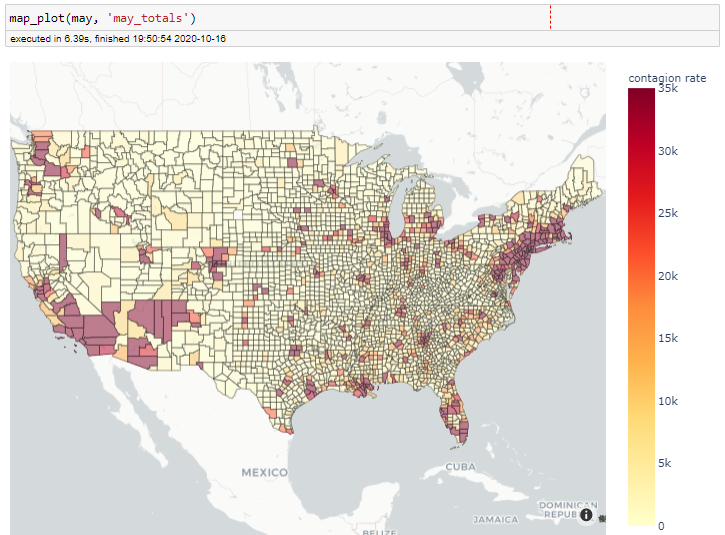

## June

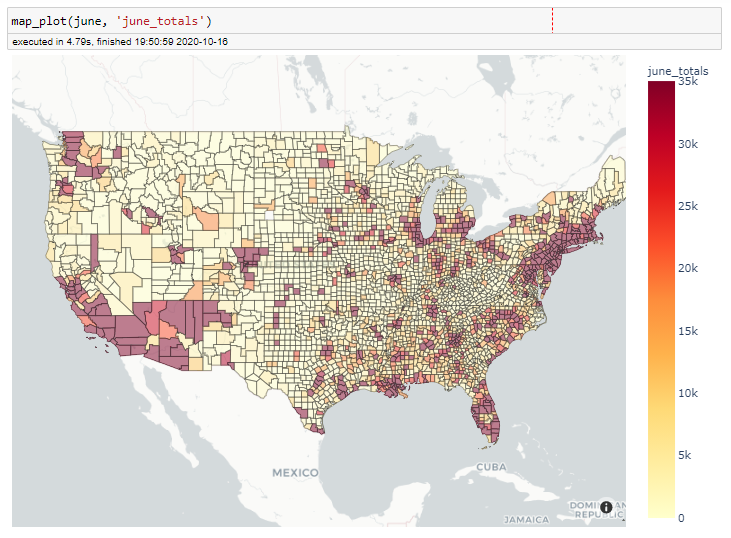

**Note**: the code for these maps can be found in the notebook "Creating Maps 1".  

We can definitely see a change in the some coastal counties in South Carolina, Louisiana, and Florida, so there is a little merit to this assumption, but the evidence is still too flimsy to make a solid case for being THE cause.  

Let's re-frame our question. Instead of "What is causing coronavirus spread during the summer months", let's ask "Who would be at most risk during the summer?"

# Seasonal Farmworkers

Despite the fact that most crops are planted in the spring and harvested in the fall, farms still need help during the summer.  In fact, the summer is when farms are hiring the most.  

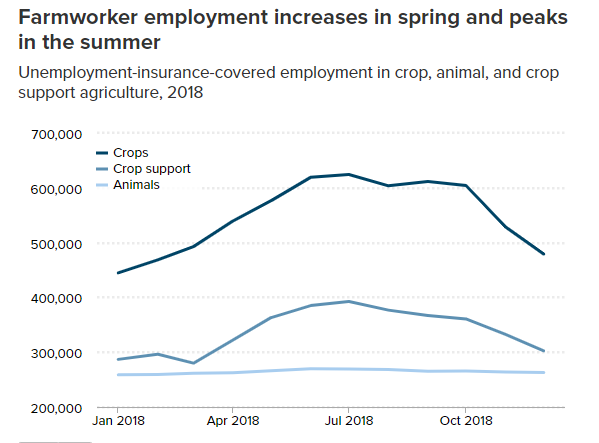
(Image source: Economic Policy Institute)

Doesn't this curve look familiar? It seems to correlate pretty well with the summer trend we're seeing in our 16 states.

So who are these farmworkers?  Seasonal farmworkers typically come from other countries, work on farms only during the summer season.  Many of them come to the country by legal means and obtain H-2A visas through the US Department of Labor.  These "H-2A" workers are here as "guests" and, as such, are entitled to certain commodities, such as shelter and employers must provide them with a safe work environment.  As soon as the season is over, these workers  will return to their home countries until they're needed next year, and they can apply for this visa again.  Sounds like a pretty great deal, right?  But there is a problem, though.  The Department of Labor only allows a certain number of these visas to be processed every year.  Too few to fulfill the demands of these farms (TheConversation.com).  In fact, when the Department of Labor made a decision in early spring to pause all processing of H-2A visas, owners of farms and fisheries across the country immediately began calling representatives explaining the critical a role that immigrant farmworkers play in our nation's food supply (WashingtonPost.com).  Still, if the number of seasonal farmworkers is insufficient, even in a good year, how do farms make up for this deficit?  

## Undocumented Immigrants

According to the New York Times, most seasonal farmworkers are undocumented immigrants.  75% of these undocumented farmworkers were born in Mexico (SAF-Unite.org).  Does Mexico have a similar trend? 

![cases_mexico_covid_mx.PNG](images/cases_mexico_covid_mx.PNG)
(Image Source: Instituciones del Gobierno de México)

Well, this is interesting.  Mexico has a very similar trend to our 16 states, but they started seeing an increase in cases back in April.  The next question is what have border crossings been like during the pandemic?  Our borders were closed a lot of this year, after all.

![border_crossings_cbp_gov.PNG](images/border_crossings_cbp_gov.PNG)
(Image Source: US Customs and Border Protection) 

The year 2020 is represented by the red line in the chart above.  Apparently there was a decrease in illegal border crossings until April.  Since April (when farm hiring starts picking up), the number of border crossings has been increasing steadily.  I should make it clear that it would be foolish to assume that all of these people have ended up at farms, but there is still a possibility that some of them found work at these farms.  

Now it's highly irresponsible to assume or imply that all or even a majority of these people had coronavirus.  I can't imagine many people would actually want to take on the risky and dangerous task of crossing the border while sick with COVID-19.  However, if many of them did find their way to farms it poses another problem, which is the living conditions.

### Living Conditions

While H-2A workers are entitled to certain standards of living and safety, undocumented immigrants don't enjoy such protections.  Many of them stay in cramped, makeshift or converted housing like this garage.

![farmer_conditions_nyt.PNG](images/farmer_conditions_nyt.PNG)


In cramped quarters like these, it is impossible to maintain social distance and quarantine effectively considering that multiple people will share the same dwelling. 

What about the workers who live off of the farm?  It's no secret that due to socioeconomic conditions, minorities are much more likely to live in multigenerational homes. 

![multi_gen_pew.PNG](images/multi_gen_pew.PNG)
(Image Source: PewResearch.org)

This leads to small homes being filled to the brim. Family members and extended family sharing rooms. Again, this makes it impossible to properly quarantine. This is possibly one of the major reasons why people of color are more likely to contract the disease.

So whether it's a worker who lives off the farm and contracts it from someone while working, or vice versa, the end result is the same: They're unable to self-quarantine and the disease spreads.

### Work Conditions

Due to the nature of modern farming (spraying chemicals/pesticides), seasonal farmworkers are at higher risk of developing respiratory issues.  This makes them particularly at risk for contracting coronavirus as it is a respiratory infection (*Protecting Farmworkers From Coronavirus and Securing the Food Supply*, AmericanProgress.org).  Again, because undocumented immigrant workers aren't entitled to the same rights as H-2A workers, they are not guaranteed the same safety.  This is not to imply that all farms are forcing workers to labor under unsafe conditions.  However, we cannot deny that it is still probable. 

Another major contributing factor to unsafe work conditions is socioeconomic pressure.  Again, it's public knowledge that undocumented immigrants are taken advantage of in contract work, often being paid much less than citizens.  Not working a day simply isn't an option for many.  This is echoed by the statement Ms. Fabian gave to the New York Times “We’re afraid of this illness. But we are more afraid that we won’t be able to make a living”. (*Farmworkers, Mostly Undocumented, Become ‘Essential’ During Pandemic*, The New York Times)

## Where Are These Farms?

So where are these farms? Are our 16 states even among the top contributors?

![farm_locations_census_agr.PNG](images/farm_locations_census_agr.PNG)
(Image Source: USDA, Agricultural Census 2017)

As we can see from the map above that most farms are in the mid-west, but no two farms are created equally.  After all, the more profitable farms most likely have more land and more workers. Let's get a map of the most profitable farms.

![richest_farms_usda.PNG](images/richest_farms_usda.PNG)
(Image Source: USDA, Agricultural Census 2017)

Ok! As you can see, most of the states that have a summer trend also have highly profitable farms.  Let's see if these areas show an increase of COVID-19 cases over the summer.

This time, we're going to account for population size of each county by dividing the number of reported cases by the estimated population of each county provided by the US Census Bureau. This will ensure that we see the number of cases proportional to the estimated population, allowing us to get a better picture of COVID spread in rural areas.

**Note**:  Because these are population estimates, we should interpret dark areas as areas with very high numbers of confirmed cases and not a confirmation that 100% of residents have been tested positive.   

### May 2020

![may_confirmed.PNG](images/may_confirmed.PNG)

Already, this map looks much different from the map we used earlier and we already see counties with a much higher rate of infection in rural areas of Georgia, Louisiana, Texas, etc. Notice how these are also locations of highly profitable farms.

### June 2020

![june_confirmed.PNG](images/june_confirmed.PNG)

In June we're seeing more spread in the rural southern areas, especially along the Mississippi River where there are clusters of highly profitable farms.   

### July

![july_confirmed.PNG](images/july_confirmed.PNG)

In July, the situation along the Mississippi River has gotten much worse.  Farming communities around Fresno, California have gotten worse as well.  The rural mid-west is also seeing an up-tick in cases. 

Also, notice vacation spots such as Las Vegas and Reno, Nevada and the coast of South Carolina, and even the Gulf Coast are seeing an increase in confirmed cases.   

### August

![august_confirmed.PNG](images/august_confirmed.PNG)

At this point, Coronavirus has spread throughout most of the south east.  California's centralized farming communities have also seen a major increase in COVID-19 cases.  In the Midwest, most of the COVID cases are in the counties with highly profitable farms.  

With all of this evidence, we can definitely say that there is a significant correlation between high profit farms and an increase in coronavirus. 

Now, you may have noticed that areas such as northern Arizona and northwestern New Mexico don't have high profit farms, but saw an exponential increase in confirmed cases.  Why is that?  

Well, let's look at what is out there. 

![reservations.PNG](images/reservations.PNG)
(Image Source: Google Maps)

# Native American Reservations

The living conditions and health care available on Native American Reservations are quite poor to say the least.  According to Native Partnership, unemployment on Native American Reservations is 7 times higher than the US.  Homelessness and overcrowding are also major issues due to lack of resources to make proper housing. In the Navajo Nation, 15% of homes lack water, and about 33% of homes do not have adequate plumbing, kitchen facilities, and bedrooms.  All of these add up to Native Americans being at a much higher risk of catching and spreading coronavirus.

![infection_cdc.PNG](images/infection_cdc.PNG)
(Image Source: CDC.gov)

According to the CDC, Native Americans have the most hospitalizations for coronavirus out of all of the other demographics.  So the rapid spread of coronavirus and increase in cases in Arizona can most likely be attributed to the terrible living conditions of Native Americans.  

# Solutions?

For one thing, we should work towards getting more rights and protections to undocumented immigrants working on farms.  If states are authorizing farmers to give them letters that indicate that they provide a "critical service", they should be treated better and they should be entitled to better living and work conditions.  If it weren't for their hard work, we, as a nation, would be dealing with a food shortage in addition to the pandemic and rising unemployment.

Inspect farms to ensure that they are providing adequate dwelling and safe work environments (respirators for people working with chemicals, adequate ventilation for indoor work, break schedules to protect them from heat exhaustion, etc..

We also need to improve the living conditions on Native American Reservations.  By working together with contractors and leaders of the Native American tribes, we can help bring jobs to reservations in the form of home construction, plumbing, and renovation in a way that benefits the Natives while also honoring and observing their wishes for their people. 

These are just a start, and are really only symptoms of a much bigger problem, which is the socioeconomic disparity that is so prevalent in America.  Solving that will be much more difficult, but will yield incredible results, not only in pandemics, but in the overall quality of the life for the average American in every demographic. 